In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
os.chdir('/home/bohdan/projects/glider/lux-ai')
from lux.config import EnvConfig
from lux.kit import GameState, process_obs, to_json, from_json, process_action, obs_to_game_state




In [3]:
import json 
def parse_kaggle_env_episode(episode):
    observations = []
    for i, step in enumerate(episode['steps']):
        obs = json.loads(step[0]['observation']['obs'])
        if i > 0:
            board = observations[-1]['board'].copy()
            board_state = obs['board']
            for key in [
                'rubble',
                'lichen',
                'lichen_strains'
            ]:
                for k, v in board_state[key].items():
                    k = k.split(',')
                    x, y = int(k[0]), int(k[1])
                    board[x, y] = v
            obs['board'] = board

        
        observations.append(obs)
        
    return observations

In [4]:

with open('dataset_generation/50785648.json', 'r') as f:
    episode = json.load(f)


env_config = EnvConfig.from_dict(episode['configuration']['env_cfg'])

lux_ai_episode = parse_kaggle_env_episode(episode)
step = 4
game_state = obs_to_game_state(step, env_config, lux_ai_episode[step])

In [5]:
from rl_agents.agent import Agent
from luxai_s2.env import LuxAI_S2
import numpy as np


configurations = {'max_episode_length': 1000, 'map_size': 48, 'verbose': 2, 'validate_action_space': True, 'max_transfer_amount': 3000, 'MIN_FACTORIES': 2, 'MAX_FACTORIES': 5, 'CYCLE_LENGTH': 50, 'DAY_LENGTH': 30, 'UNIT_ACTION_QUEUE_SIZE': 20, 'MAX_RUBBLE': 100, 'FACTORY_RUBBLE_AFTER_DESTRUCTION': 50, 'INIT_WATER_METAL_PER_FACTORY': 150, 'INIT_POWER_PER_FACTORY': 1000, 'MIN_LICHEN_TO_SPREAD': 20, 'LICHEN_LOST_WITHOUT_WATER': 1, 'LICHEN_GAINED_WITH_WATER': 1, 'MAX_LICHEN_PER_TILE': 100, 'POWER_PER_CONNECTED_LICHEN_TILE': 1, 'LICHEN_WATERING_COST_FACTOR': 10, 'BIDDING_SYSTEM': True, 'FACTORY_PROCESSING_RATE_WATER': 100, 'ICE_WATER_RATIO': 4, 'FACTORY_PROCESSING_RATE_METAL': 50, 'ORE_METAL_RATIO': 5, 'FACTORY_CHARGE': 50, 'FACTORY_WATER_CONSUMPTION': 1, 'POWER_LOSS_FACTOR': 0.5, 'ROBOTS': {'LIGHT': {'METAL_COST': 10, 'POWER_COST': 50, 'CARGO_SPACE': 100, 'BATTERY_CAPACITY': 150, 'CHARGE': 1, 'INIT_POWER': 50, 'MOVE_COST': 1, 'RUBBLE_MOVEMENT_COST': 0.05, 'DIG_COST': 5, 'DIG_RUBBLE_REMOVED': 2, 'DIG_RESOURCE_GAIN': 2, 'DIG_LICHEN_REMOVED': 10, 'SELF_DESTRUCT_COST': 10, 'RUBBLE_AFTER_DESTRUCTION': 1, 'ACTION_QUEUE_POWER_COST': 1}, 'HEAVY': {'METAL_COST': 100, 'POWER_COST': 500, 'CARGO_SPACE': 1000, 'BATTERY_CAPACITY': 3000, 'CHARGE': 10, 'INIT_POWER': 500, 'MOVE_COST': 20, 'RUBBLE_MOVEMENT_COST': 1, 'DIG_COST': 60, 'DIG_RUBBLE_REMOVED': 20, 'DIG_RESOURCE_GAIN': 20, 'DIG_LICHEN_REMOVED': 100, 'SELF_DESTRUCT_COST': 100, 'RUBBLE_AFTER_DESTRUCTION': 10, 'ACTION_QUEUE_POWER_COST': 10}}}
agent = Agent('player_0', configurations)

env_config = EnvConfig.from_dict(configurations)

pygame 2.2.0 (SDL 2.0.22, Python 3.9.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [6]:
game_state.board

Board(rubble=[[83, 79, 75, 72, 68, 65, 62, 59, 57, 56, 55, 55, 54, 52, 51, 50, 50, 51, 54, 56, 58, 59, 60, 60, 60, 60, 59, 58, 56, 54, 51, 50, 50, 51, 52, 54, 55, 55, 56, 57, 59, 62, 65, 68, 72, 75, 79, 83], [81, 77, 73, 70, 67, 64, 61, 59, 58, 57, 56, 56, 55, 53, 52, 50, 50, 52, 54, 11, 11, 57, 57, 57, 57, 57, 57, 57, 56, 54, 52, 50, 50, 52, 53, 55, 56, 56, 11, 11, 11, 61, 64, 67, 70, 73, 77, 81], [79, 75, 14, 67, 64, 62, 60, 59, 58, 11, 11, 56, 55, 54, 52, 51, 51, 52, 53, 11, 11, 11, 55, 54, 54, 55, 56, 56, 55, 53, 52, 51, 51, 52, 54, 55, 56, 57, 11, 11, 11, 12, 62, 64, 67, 71, 75, 79], [77, 14, 13, 13, 63, 61, 60, 59, 11, 11, 11, 11, 11, 54, 53, 52, 51, 52, 54, 11, 11, 11, 54, 53, 53, 54, 55, 55, 55, 54, 52, 10, 10, 10, 54, 56, 57, 58, 58, 11, 11, 12, 61, 63, 65, 69, 73, 77], [76, 14, 13, 12, 62, 60, 60, 60, 59, 11, 11, 11, 11, 55, 53, 52, 52, 53, 54, 55, 11, 11, 10, 53, 53, 54, 55, 56, 55, 54, 10, 10, 10, 10, 55, 56, 58, 59, 59, 59, 60, 12, 12, 12, 12, 68, 72, 76], [76, 14, 13, 12,

obs, kolejki
# ------------------------------

1. Z naszą siecią uczymy się powtarzać zachowanie agenta. Być może w przypadku, jeśli w zbiorze danych będzie dużo różnych agentów 
to wprowadzi zamieszanie i nie będziemy w stanie nauczyć się wzorców. W związku z tym, dobrze by było porównać sieć wytrenowane na "mieszance" agentów z siecią wytrenowaną na najlepszym.


2. Skupiamy się na tym, żeby dla danego stanu planszy wiedzieć jaka jest optymalna kolejka.
Pytania i odpowiedzi:
- Czy przewidujemy kolejkę dla jednego robota, czy dla wszystkich?

Dla jednego, ponieważ nie wiemy jak zrobić zmiennowymiarowe wyjście

- Jak porównać ze sobą dwie architektury sieci przewidujących kolejkę kiedy one już będą wytrenowane?

Stawiamy do naszego środowiska dwie sieci, które na każdym z kroków przewidują kolejki. Patrzymy na wyniki.

- Wejście/wyjście 
Wejście - cały stan planszy 
Wyjście - kolejka 

---- 
Na za tydzień próbujemy wytrenować sieci.


# What to do

[ ] Prosta wizualizacja stanu w lux ai podobna do tego co był w tym tutorialu

[ ] LeViT

[ ] LeViT + informacja o robocie

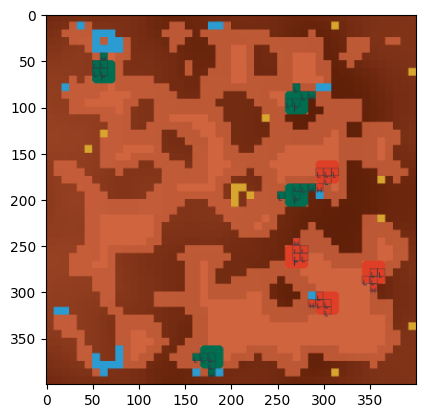

In [7]:
from luxai_s2.pyvisual.visualizer import Visualizer
from luxai_s2.state import State
from matplotlib import pyplot as plt

env_state = State.from_obs(lux_ai_episode[step], env_config)
vis = Visualizer(env_state)
vis.update_scene(env_state)
w = h = 400
img = vis._create_image_array(vis.surf, (w, h))
plt.imshow(img)



In [8]:
from gym import spaces
spaces.Box(0, 13, (13,), dtype=np.uint8).sample()

array([ 5, 11,  1, 10, 10,  1,  8, 12,  8, 11, 13, 11, 13], dtype=uint8)

In [9]:
lux_ai_episode[10]

{'units': {'player_0': {'unit_8': {'team_id': 0,
    'unit_id': 'unit_8',
    'power': 461,
    'unit_type': 'HEAVY',
    'pos': [34, 37],
    'cargo': {'ice': 140, 'ore': 0, 'water': 0, 'metal': 0},
    'action_queue': [[3, 0, 0, 0, 0, 1], [3, 0, 0, 0, 0, 1]]},
   'unit_9': {'team_id': 0,
    'unit_id': 'unit_9',
    'power': 653,
    'unit_type': 'HEAVY',
    'pos': [42, 35],
    'cargo': {'ice': 140, 'ore': 0, 'water': 0, 'metal': 0},
    'action_queue': [[3, 0, 0, 0, 0, 1], [3, 0, 0, 0, 0, 1]]},
   'unit_10': {'team_id': 0,
    'unit_id': 'unit_10',
    'power': 573,
    'unit_type': 'HEAVY',
    'pos': [32, 29],
    'cargo': {'ice': 140, 'ore': 0, 'water': 0, 'metal': 0},
    'action_queue': [[3, 0, 0, 0, 0, 1], [3, 0, 0, 0, 0, 1]]},
   'unit_11': {'team_id': 0,
    'unit_id': 'unit_11',
    'power': 814,
    'unit_type': 'HEAVY',
    'pos': [35, 22],
    'cargo': {'ice': 0, 'ore': 0, 'water': 0, 'metal': 0},
    'action_queue': [[3, 0, 0, 0, 0, 1],
     [3, 0, 0, 0, 0, 1],
     [

In [10]:
env_state.units

{'player_0': {'unit_8': <luxai_s2.unit.Unit at 0x7f036cc9ae80>,
  'unit_9': <luxai_s2.unit.Unit at 0x7f036cc9a580>,
  'unit_10': <luxai_s2.unit.Unit at 0x7f036cc9a280>,
  'unit_11': <luxai_s2.unit.Unit at 0x7f036cc9a6a0>,
  'unit_16': <luxai_s2.unit.Unit at 0x7f036cc9aa90>,
  'unit_17': <luxai_s2.unit.Unit at 0x7f036cc9ac10>,
  'unit_18': <luxai_s2.unit.Unit at 0x7f036cc9a370>,
  'unit_19': <luxai_s2.unit.Unit at 0x7f036cc9a520>,
  'unit_24': <luxai_s2.unit.Unit at 0x7f036cc9aa60>,
  'unit_25': <luxai_s2.unit.Unit at 0x7f0373a2f550>,
  'unit_26': <luxai_s2.unit.Unit at 0x7f0373a2f1c0>,
  'unit_27': <luxai_s2.unit.Unit at 0x7f0373a2f730>,
  'unit_32': <luxai_s2.unit.Unit at 0x7f0337f74940>,
  'unit_33': <luxai_s2.unit.Unit at 0x7f0337f747f0>,
  'unit_34': <luxai_s2.unit.Unit at 0x7f03357c1370>,
  'unit_35': <luxai_s2.unit.Unit at 0x7f03357c1550>,
  'unit_40': <luxai_s2.unit.Unit at 0x7f03357c17f0>,
  'unit_41': <luxai_s2.unit.Unit at 0x7f03357c18e0>,
  'unit_42': <luxai_s2.unit.Unit at 